In [ ]:
# Dataset characteristics
# =========================================
# Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
#
#        - instant: record index
#        - dteday : date
#        - season : season (1:springer, 2:summer, 3:fall, 4:winter)
#        - yr : year (0: 2011, 1:2012)
#        - mnth : month ( 1 to 12)
#        - hr : hour (0 to 23)
#        - holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
#        - weekday : day of the week
#        - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#        + weathersit :
#                - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#                - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#                - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#                - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#        - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
#        - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
#        - hum: Normalized humidity. The values are divided to 100 (max)
#        - windspeed: Normalized wind speed. The values are divided to 67 (max)
#        - casual: count of casual users
#        - registered: count of registered users
#        - cnt: count of total rental bikes including both casual and registered

In [3]:
#%%html
#<link rel="stylesheet" href="static/hyrule.css" type="text/css">

# Import packages 
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read bicycle use data
url = "/Users/Glenn/Documents/GA_Data_Science/Git_Dir/DAT_20_NYC/Data/bikeshare.csv"
bike_data = pd.read_csv(url,parse_dates=['dteday'])
# print bike_data.head(50)

# Combine hourly observations to make a daily dataframe.   
# Need to first get number of observations per day (not always 24 observations)

observs = bike_data.groupby('dteday').instant.count()

# Create data frame which contains daily data.   Averages are divided by number of observations

bike_data_daily = bike_data.groupby('dteday').sum()
bike_data_daily['observs'] = observs

bike_data_daily.season /= bike_data_daily.observs
bike_data_daily.mnth /= bike_data_daily.observs
bike_data_daily.holiday /= bike_data_daily.observs
bike_data_daily.weathersit /= bike_data_daily.observs
bike_data_daily.temp /= bike_data_daily.observs 
bike_data_daily.temp *= 41              # Convert to range
bike_data_daily.atemp /= bike_data_daily.observs
bike_data_daily.atemp *= 50             # Convert to range
bike_data_daily.hum /= bike_data_daily.observs  # Convert to range
bike_data_daily.hum *= 100
bike_data_daily.windspeed /= bike_data_daily.observs # Convert to range 
bike_data_daily.windspeed *= 67

#### I created the daily information by summing observations over a groupby.  To calculate accurate averages, I needed to count the number of hourly observations, as there was some missing data.    Hence the calculated column 'observs'

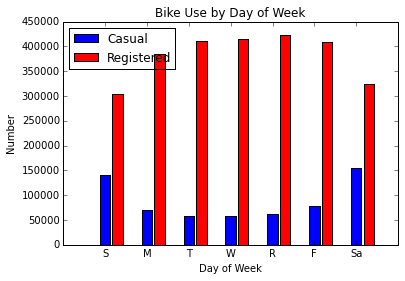

In [194]:
# View bike use by day of week by 'type' of rider - casual or registered

# Define the plots using groupby

p1 = plt.bar(bike_data.groupby('weekday').casual.sum().index,bike_data.groupby('weekday').casual.sum(), width = 0.25, align= 'center')
p2 = plt.bar(bike_data.groupby('weekday').registered.sum().index+0.3,bike_data.groupby('weekday').registered.sum(), width = 0.25, align= 'center',color ='red')

# add some text for labels, title, legend and axes
plt.ylabel('Number')
plt.xlabel('Day of Week')
plt.title('Bike Use by Day of Week')
plt.legend( (p1[0], p2[0]), ('Casual', 'Registered'),loc=2)
plt.xticks(bike_data.groupby('weekday').casual.sum().index,('S', 'M', 'T', 'W', 'R','F','Sa') )

# Plot it!!
plt.show()

##### The graph above illustrates that rider behaviour is a function of the day of the week.   Casual riders use bikes more often on weekends, Registered Users use bikes more often during the week.   A theory is that Registered Users use bikes more regularly, and are more likely to use them for commuting to and from work. 

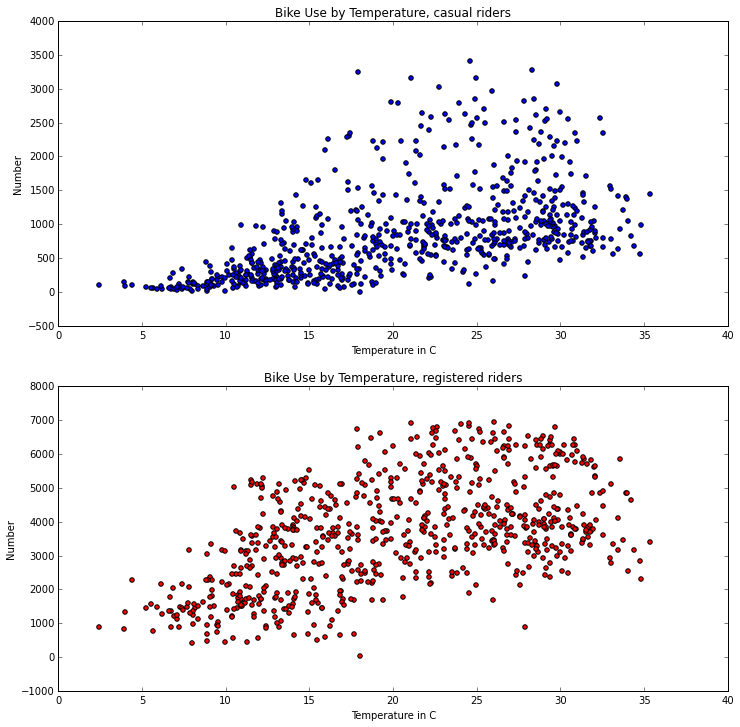

In [213]:
# Plot total bike use by daily 'Normalized' temperature

plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
p1 = plt.scatter(bike_data_daily.temp,bike_data_daily.casual)
plt.title('Bike Use by Temperature, casual riders')
plt.ylabel('Number')
plt.xlabel('Temperature in C')

plt.subplot(2,1,2)
p2 = plt.scatter(bike_data_daily.temp,bike_data_daily.registered, c='red')
plt.title('Bike Use by Temperature, registered riders')
plt.ylabel('Number')
plt.xlabel('Temperature in C')


# Plot it!!
plt.show()

#### The above graphs show a correlation between temperature and bike use.  Superficially, there appears to be a stronger correlation between increasing temperature and usage for registered users (to be determined statistically)

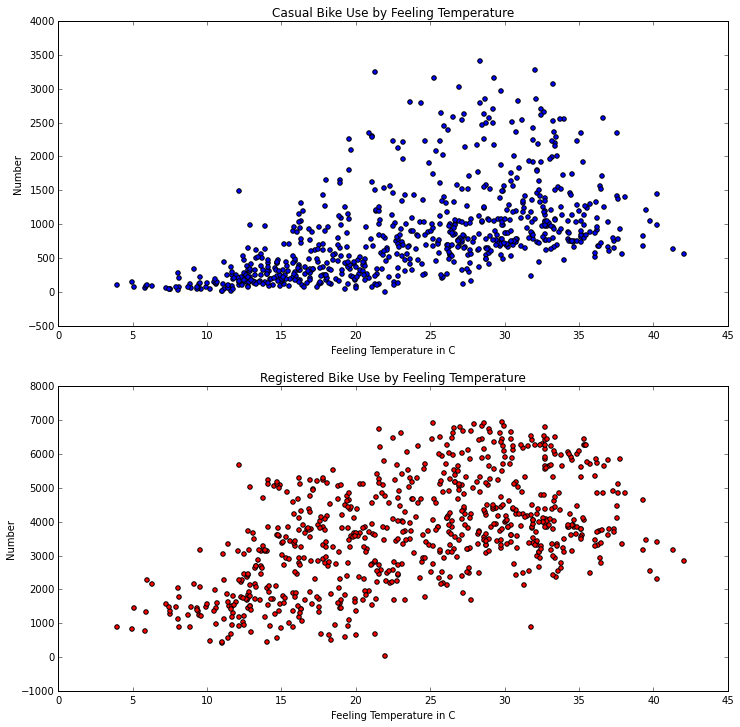

In [214]:
# Plot total bike use by 'feeling'  temperature
plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
p1 = plt.scatter(bike_data_daily.atemp,bike_data_daily.casual)
plt.ylabel('Number')
plt.xlabel('Feeling Temperature in C')
plt.title('Casual Bike Use by Feeling Temperature')

plt.subplot(2,1,2)
p2 = plt.scatter(bike_data_daily.atemp,bike_data_daily.registered, c='red')
plt.ylabel('Number')
plt.xlabel('Feeling Temperature in C')
plt.title('Registered Bike Use by Feeling Temperature')

# Plot it!!
plt.show()

#### As in the previous graph, there is a correlation between 'Feeling' temperature and ridership, with Registered riders being more sensitive to changes in Feeling Temperature.  Also, unlike casual riders, there appears to be a decline in usage when the feeling temperature goes above ~ 30C

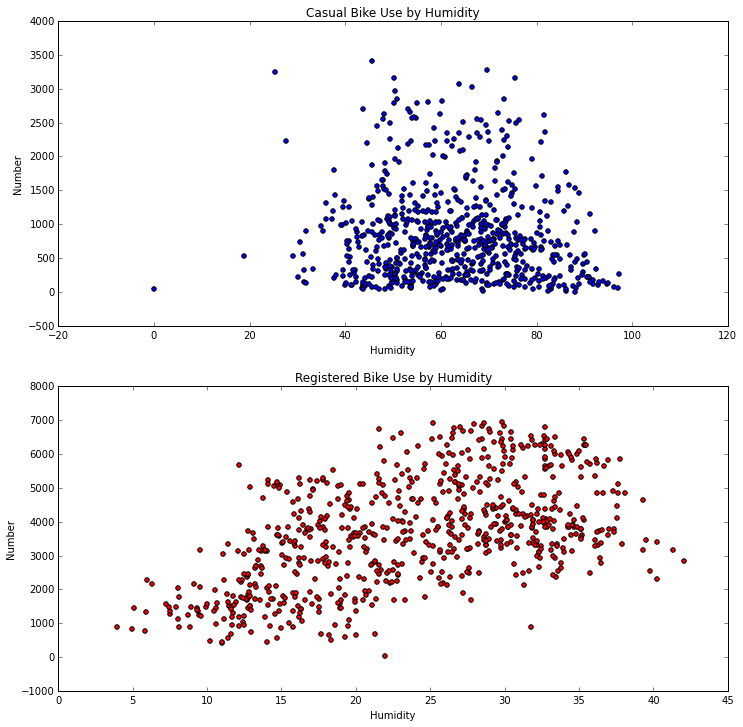

In [216]:
# Plot total bike use by humidity
plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
p1 = plt.scatter(bike_data_daily.hum,bike_data_daily.casual)
plt.ylabel('Number')
plt.xlabel('Humidity')
plt.title('Casual Bike Use by Humidity')

plt.subplot(2,1,2)
p2 = plt.scatter(bike_data_daily.atemp,bike_data_daily.registered, c='red')
plt.ylabel('Number')
plt.xlabel('Humidity')
plt.title('Registered Bike Use by Humidity')

# Plot it!!
plt.show()

#### One interesting characteristic in the above graphs is the absence of significant casual ridership at humidity levels below 20%.  Perhaps there's a correlation between humidity and temperature, the implication being that casual riders are less likely to ride during periods of cold. 

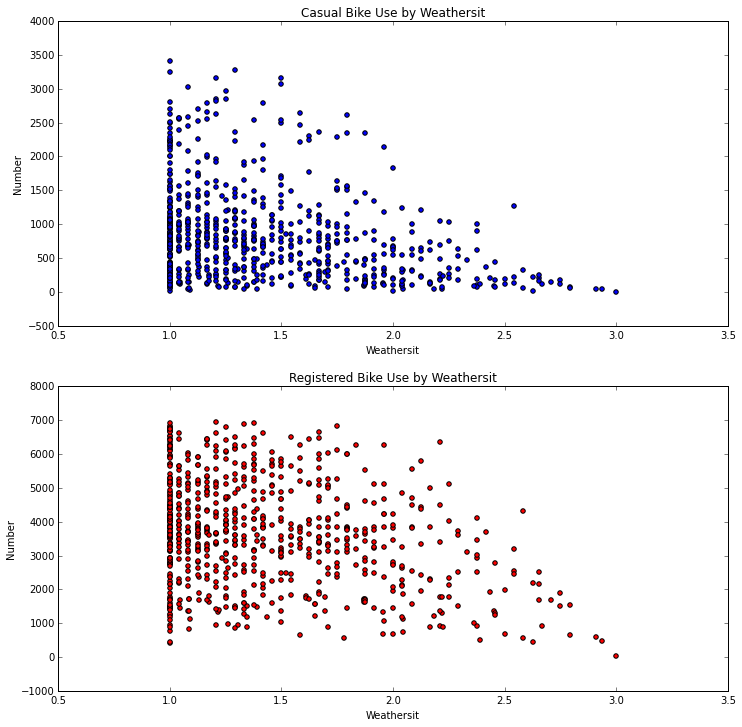

In [217]:
# Plot total bike use by weathersit
plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
p1 = plt.scatter(bike_data_daily.weathersit,bike_data_daily.casual)
plt.ylabel('Number')
plt.xlabel('Weathersit')
plt.title('Casual Bike Use by Weathersit')

plt.subplot(2,1,2)
p2 = plt.scatter(bike_data_daily.weathersit,bike_data_daily.registered, c='red')
plt.ylabel('Number')
plt.xlabel('Weathersit')
plt.title('Registered Bike Use by Weathersit')

# Plot it!!
plt.show()

#### Unsurprisingly, the wetter the weather, the less the ridership for both types of users.  Note that due to daily averaging, the Weathersit variable is not discrete. 